<a href="https://www.kaggle.com/code/hossamrizk/my-pc-knows-arabic?scriptVersionId=149252708" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
# Handel files
import pandas as pd
import os
import numpy as np
# Virsualization
import matplotlib.pyplot as plt

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,GlobalAveragePooling2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

# Load Data

In [2]:
# import Data
X_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv').to_numpy()
y_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv').to_numpy()-1
X_test=pd.read_csv('/kaggle/input/ahcd1/csvTestImages 3360x1024.csv').to_numpy()
y_test=pd.read_csv('/kaggle/input/ahcd1/csvTestLabel 3360x1.csv').to_numpy()-1

In [3]:
# Shape of data
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_train shape is ',y_test.shape)

X_train shape is  (13439, 1024)
X_test shape is  (3359, 1024)
y_train shape is  (13439, 1)
y_train shape is  (3359, 1)


In [4]:
# Reshape
X_train = X_train.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)

In [5]:
X_train.shape

(13439, 32, 32, 1)

In [6]:
X_test.shape

(3359, 32, 32, 1)

In [7]:
y_train.shape

(13439, 1)

In [8]:
y_test.shape

(3359, 1)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(13439, 28)

In [11]:
y_test.shape

(3359, 28)

# Data Augmentation

In [12]:
# Data Augmentation
gen=ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.3
)
train_data=gen.flow(
    X_train,
    y_train,
)

# Model

In [13]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(28, activation='softmax')
])


# Callbacks

In [14]:
reduce=ReduceLROnPlateau(
    factor=0.1,
    min_lr=0.00001
)

In [15]:
callbacks=[reduce]

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          7

# Fiting

In [18]:
model.fit(
    train_data,
    epochs=30,
    validation_data=(X_test,y_test),
    callbacks=callbacks
    
)

Epoch 1/30
420/420 [==============================] - 11s 10ms/step - loss: 1.7118 - accuracy: 0.4501 - val_loss: 103.5588 - val_accuracy: 0.7118
Epoch 2/30
420/420 [==============================] - 4s 10ms/step - loss: 0.6737 - accuracy: 0.7624 - val_loss: 51.7598 - val_accuracy: 0.8782
Epoch 3/30
420/420 [==============================] - 4s 10ms/step - loss: 0.4425 - accuracy: 0.8463 - val_loss: 50.3322 - val_accuracy: 0.9006
Epoch 4/30
420/420 [==============================] - 4s 9ms/step - loss: 0.3442 - accuracy: 0.8829 - val_loss: 44.9885 - val_accuracy: 0.8988
Epoch 5/30
420/420 [==============================] - 4s 9ms/step - loss: 0.2751 - accuracy: 0.9043 - val_loss: 44.2305 - val_accuracy: 0.9074
Epoch 6/30
420/420 [==============================] - 4s 10ms/step - loss: 0.2454 - accuracy: 0.9170 - val_loss: 36.4283 - val_accuracy: 0.9348
Epoch 7/30
420/420 [==============================] - 4s 10ms/step - loss: 0.2133 - accuracy: 0.9282 - val_loss: 53.3127 - val_accuracy:

# Accuracy

In [19]:
losses=pd.DataFrame(model.history.history)

In [20]:
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,1.711812,0.450108,103.558838,0.711819,0.0010
1,0.673740,0.762408,51.759815,0.878238,0.0010
2,0.442483,0.846268,50.332203,0.900566,0.0010
3,0.344182,0.882878,44.988480,0.898779,0.0010
4,0.275098,0.904308,44.230453,0.907413,0.0010
5,0.245419,0.916958,36.428276,0.934802,0.0010
6,0.213344,0.928194,53.312695,0.908901,0.0010
7,0.187177,0.939058,36.845863,0.945817,0.0010
8,0.175365,0.941886,63.565739,0.903840,0.0010
9,0.148597,0.948359,42.136539,0.936588,0.0010


<AxesSubplot:>

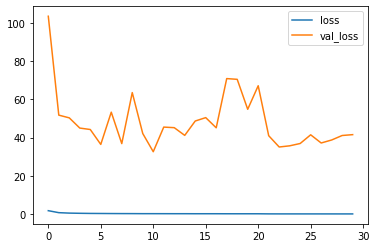

In [21]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

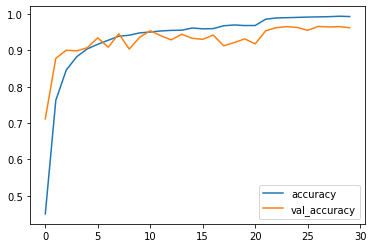

In [22]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

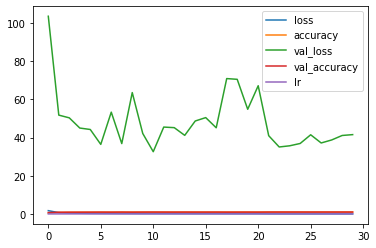

In [23]:
losses.plot()

In [24]:
model.evaluate(X_test,y_test)

105/105 [==============================] - 0s 2ms/step - loss: 41.5403 - accuracy: 0.9625


[41.54025650024414, 0.9624888300895691]

### 

In [25]:
arabic_phonetic = [
    'أ (A)', 'ب (Ba)', 'ت (Ta)', 'ث (Tha)', 'ج (Ja)', 'ح (Ha)', 'خ (Kha)', 'د (Da)', 'ذ (Dha)',
    'ر (Ra)', 'ز (Za)', 'س (Sa)', 'ش (Sha)', 'ص (Saad)', 'ض (Daad)', 'ط (Ta)', 'ظ (Zha)',
    'ع (Ain)', 'غ (Ghain)', 'ف (Fa)', 'ق (Qa)', 'ك (Ka)', 'ل (La)', 'م (Ma)', 'ن (Na)',
    'هـ (Ha)', 'و (Wa)', 'ي (Ya)'
]


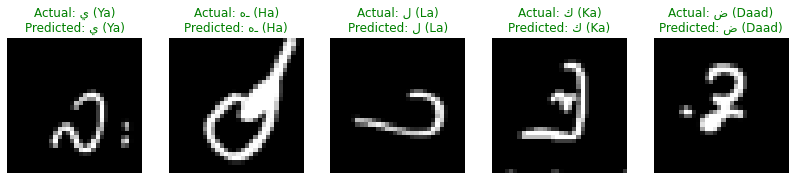

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def print_actual_vs_predicted_images(X_test, y_test, model, arabic_phonetic, num_samples=5):
    num_samples = min(num_samples, X_test.shape[0])
    sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

    plt.figure(figsize=(14, 15))
    for i, sample_index in enumerate(sample_indices):
        image = X_test[sample_index]
        actual_label = np.argmax(y_test[sample_index])
        predicted_label = np.argmax(model.predict(image.reshape(1, 32, 32, 1)))

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.reshape(32, 32), cmap='gray')

        title_color = 'g' if predicted_label == actual_label else 'r'
        title = f"Actual: {arabic_phonetic[actual_label]}\nPredicted: {arabic_phonetic[predicted_label]}"
        plt.title(title, color=title_color)

        plt.axis('off')

    plt.show()

# Call the function with the appropriate arguments
print_actual_vs_predicted_images(X_test, y_test, model, arabic_phonetic, num_samples=5)